In [1]:
import os
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import geoplot as gplt
import geoplot.crs as gcrs
import mapclassify as mc

In [2]:
nepal_gapa_napa = gpd.read_file("./data/Shape_Data/local_unit.shp")

In [3]:
nepal_gapa_napa.head()

,STATE_CODE,DISTRICT,GaPa_NaPa,Type_GN,Province,geometry
0,1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,1,"POLYGON ((87.60985 27.37043, 87.61107 27.36943..."
1,1,TAPLEJUNG,Maiwakhola,Gaunpalika,1,"POLYGON ((87.50402 27.42901, 87.50672 27.42831..."
2,1,TAPLEJUNG,Meringden,Gaunpalika,1,"POLYGON ((87.51272 27.56894, 87.51255 27.56859..."
3,1,TAPLEJUNG,Mikwakhola,Gaunpalika,1,"POLYGON ((87.6885 27.70975, 87.68891 27.70938,..."
4,1,TAPLEJUNG,Phaktanglung,Gaunpalika,1,"POLYGON ((87.83673 27.95137, 87.83735 27.95119..."


In [4]:
nepal_gapa_napa.shape

(777, 6)

In [5]:
nepal_gapa_napa['DISTRICT'].nunique()

77

In [6]:
nepal_districs = nepal_gapa_napa.dissolve(by='DISTRICT',as_index=False)

In [7]:
nepal_districs = nepal_districs[['DISTRICT','geometry']]

In [8]:
nepal_districs.head()

,DISTRICT,geometry
0,ACHHAM,"POLYGON ((81.29881 28.92455, 81.29866 28.92438..."
1,ARGHAKHANCHI,"POLYGON ((83.00481 27.92912, 83.00494 27.92935..."
2,BAGLUNG,"POLYGON ((83.28374 28.18997, 83.28297 28.1897,..."
3,BAITADI,"POLYGON ((80.36947 29.34978, 80.36939 29.34955..."
4,BAJHANG,"POLYGON ((81.02629 29.41997, 81.02607 29.42042..."


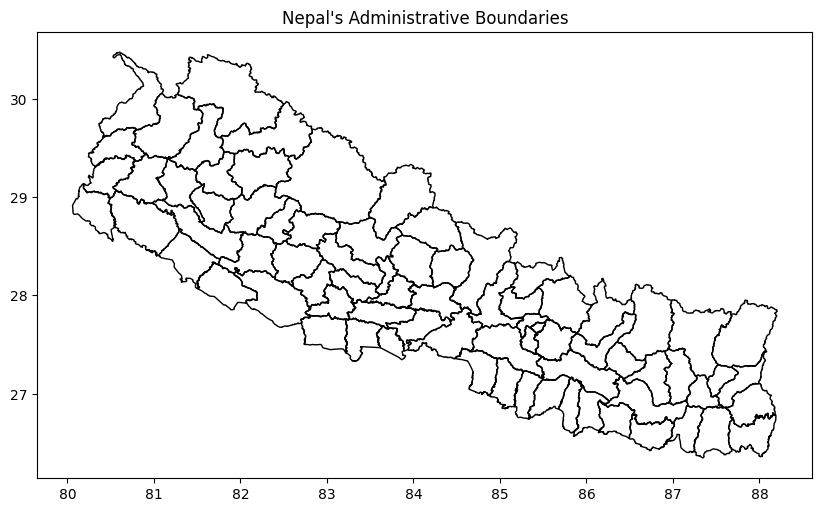

In [9]:
# Plot Nepal Map 
fig, ax = plt.subplots(figsize=(10, 6))
nepal_districs.plot(ax=ax, color='none', edgecolor='black')
plt.title("Nepal's Administrative Boundaries")
plt.show()

In [10]:
## read temperature and precipitation data
file_path = r'./data/climate_data_nepal_district_wise_monthly.csv'
env_data = gpd.read_file(file_path)

In [11]:
env_data.head()

,DATE,YEAR,MONTH,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,...,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
0,1/31/1981,1981,1,Arghakhanchi,27.9,83.2,67.31,93.78,5.28,53.09,...,10.03,11.19,2.01,3.39,0.81,2.59,2.7,4.22,1.06,3.16
1,2/28/1981,1981,2,Arghakhanchi,27.9,83.2,3.37,93.52,5.13,40.88,...,13.08,15.1,2.58,4.88,0.95,3.94,3.51,5.62,1.09,4.53
2,3/31/1981,1981,3,Arghakhanchi,27.9,83.2,26.02,93.4,5.91,35.84,...,13.52,20.58,2.73,4.67,1.02,3.65,3.73,5.72,1.38,4.34
3,4/30/1981,1981,4,Arghakhanchi,27.9,83.2,46.15,93.03,6.52,29.81,...,15.03,25.63,2.89,4.78,1.07,3.72,3.82,5.66,1.35,4.31
4,5/31/1981,1981,5,Arghakhanchi,27.9,83.2,69.45,92.75,9.95,37.25,...,13.43,29.99,2.69,4.4,0.93,3.47,3.52,5.29,1.3,4


In [12]:
env_data['DISTRICT'].nunique()

62

In [13]:
env_data['DISTRICT'] = env_data['DISTRICT'].str.upper()

In [14]:
temp_prec_data = env_data[['YEAR','MONTH','DISTRICT','TS', 'PRECTOT']]

In [15]:
temp_prec_data.head()

,YEAR,MONTH,DISTRICT,TS,PRECTOT
0,1981,1,ARGHAKHANCHI,11.19,67.31
1,1981,2,ARGHAKHANCHI,15.1,3.37
2,1981,3,ARGHAKHANCHI,20.58,26.02
3,1981,4,ARGHAKHANCHI,25.63,46.15
4,1981,5,ARGHAKHANCHI,29.99,69.45


In [16]:
temp_prec_data.isna().sum()

YEAR        0
MONTH       0
DISTRICT    0
TS          0
PRECTOT     0
dtype: int64

In [17]:
temp_prec_data['TS'] = pd.to_numeric(temp_prec_data['TS'])
temp_prec_data['PRECTOT'] = pd.to_numeric(temp_prec_data['PRECTOT'])

C:\Users\kpp\AppData\Local\Temp\ipykernel_5524\1141295053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_prec_data['TS'] = pd.to_numeric(temp_prec_data['TS'])
C:\Users\kpp\AppData\Local\Temp\ipykernel_5524\1141295053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_prec_data['PRECTOT'] = pd.to_numeric(temp_prec_data['PRECTOT'])


In [ ]:
temp_prec_data['DISTRICT'].nunique()

: 

In [19]:
nepal_districs['DISTRICT'].nunique()

77

In [20]:
merged_data = nepal_districs.merge(temp_prec_data, left_on='DISTRICT',right_on='DISTRICT')

In [21]:
temp_prec_data.shape

(29016, 5)

In [22]:
merged_data.shape

(24336, 6)

In [23]:
merged_data.tail()

,DISTRICT,geometry,YEAR,MONTH,TS,PRECTOT
24331,UDAYAPUR,"POLYGON ((87.01112 26.70928, 87.01105 26.70923...",2019,8,27.11,4.46
24332,UDAYAPUR,"POLYGON ((87.01112 26.70928, 87.01105 26.70923...",2019,9,25.25,9.93
24333,UDAYAPUR,"POLYGON ((87.01112 26.70928, 87.01105 26.70923...",2019,10,22.08,0.28
24334,UDAYAPUR,"POLYGON ((87.01112 26.70928, 87.01105 26.70923...",2019,11,18.75,0.04
24335,UDAYAPUR,"POLYGON ((87.01112 26.70928, 87.01105 26.70923...",2019,12,12.57,0.35


In [24]:
merged_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 24336 entries, 0 to 24335
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   DISTRICT  24336 non-null  object  
 1   geometry  24336 non-null  geometry
 2   YEAR      24336 non-null  object  
 3   MONTH     24336 non-null  object  
 4   TS        24336 non-null  float64 
 5   PRECTOT   24336 non-null  float64 
dtypes: float64(2), geometry(1), object(3)
memory usage: 1.1+ MB


In [25]:
# merged_data['TS'] = pd.to_numeric(merged_data['TS'])
# merged_data['PRECTOT'] = pd.to_numeric(merged_data['PRECTOT'])

In [26]:
# merged_data[(merged_data['YEAR']=='2019') & (merged_data['MONTH']=='1')]

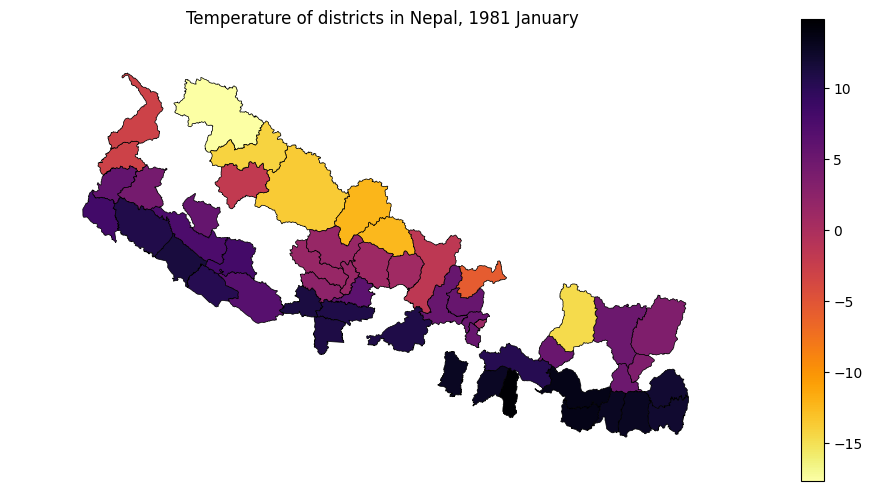

In [27]:
## plot temperature data of districts for 1981
scheme = mc.Quantiles(merged_data['TS'], k=10)
gplt.choropleth(
    merged_data[(merged_data['YEAR']=='1981') & (merged_data['MONTH']=='1')],
    hue='TS',
    projection=gcrs.AlbersEqualArea(),
#     scheme=scheme,
    legend=True,
    cmap='inferno_r',
    linewidth=0.5,    
    figsize=(12, 6),
    edgecolor='black',
)
plt.title("Temperature of districts in Nepal, 1981 January")
plt.show()

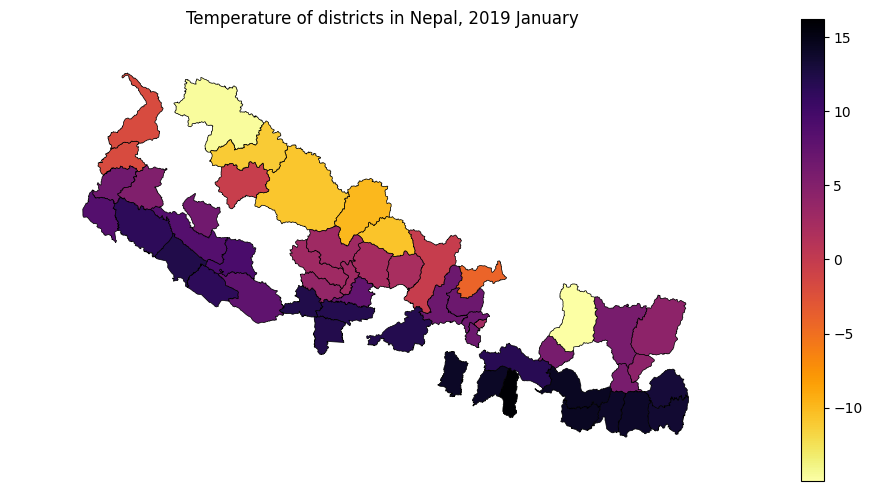

In [28]:
## plot temperature data of districts for 2019
gplt.choropleth(
    merged_data[(merged_data['YEAR']=='2019') & (merged_data['MONTH']=='1')],
    hue='TS',
    projection=gcrs.AlbersEqualArea(),
    legend=True,
    cmap='inferno_r',
    linewidth=0.5,    
    figsize=(12, 6),
    edgecolor='black',
)
plt.title("Temperature of districts in Nepal, 2019 January")
plt.show()

In [29]:
merged_data.head()

,DISTRICT,geometry,YEAR,MONTH,TS,PRECTOT
0,ARGHAKHANCHI,"POLYGON ((83.00481 27.92912, 83.00494 27.92935...",1981,1,11.19,67.31
1,ARGHAKHANCHI,"POLYGON ((83.00481 27.92912, 83.00494 27.92935...",1981,2,15.10,3.37
2,ARGHAKHANCHI,"POLYGON ((83.00481 27.92912, 83.00494 27.92935...",1981,3,20.58,26.02
3,ARGHAKHANCHI,"POLYGON ((83.00481 27.92912, 83.00494 27.92935...",1981,4,25.63,46.15
4,ARGHAKHANCHI,"POLYGON ((83.00481 27.92912, 83.00494 27.92935...",1981,5,29.99,69.45


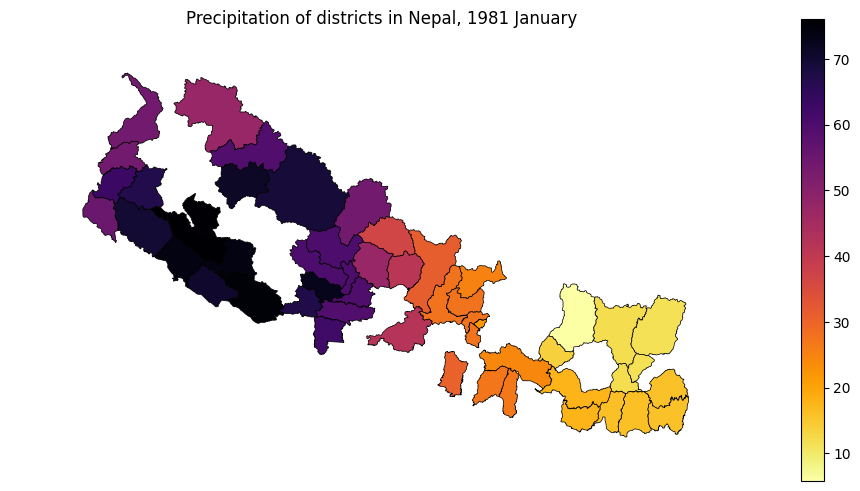

In [30]:
## plot Precipitation data of districts for 1981
gplt.choropleth(
    merged_data[(merged_data['YEAR']=='1981') & (merged_data['MONTH']=='1')],
    hue='PRECTOT',
    projection=gcrs.AlbersEqualArea(),
    legend=True,
    cmap='inferno_r',
    linewidth=0.5,    
    figsize=(12, 6),
    edgecolor='black',
)
plt.title("Precipitation of districts in Nepal, 1981 January")
plt.show()

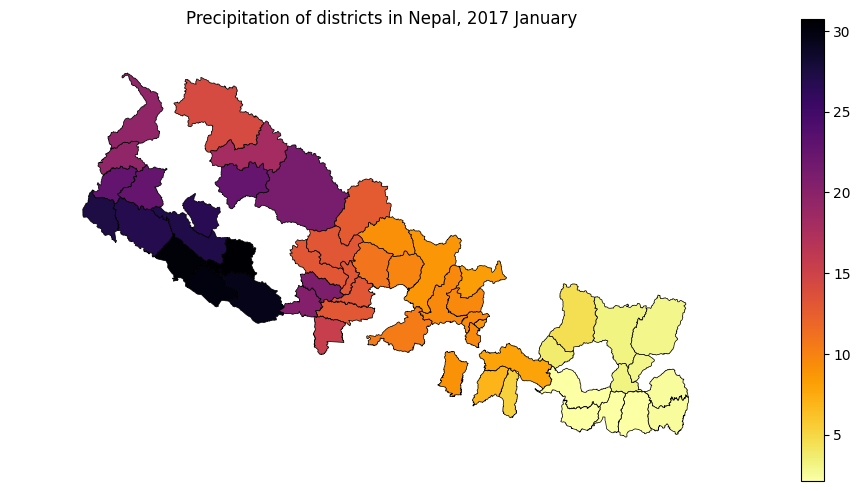

In [31]:
## plot Precipitation data of districts for 1981
gplt.choropleth(
    merged_data[(merged_data['YEAR']=='2017') & (merged_data['MONTH']=='1')],
    hue='PRECTOT',
    projection=gcrs.AlbersEqualArea(),
    legend=True,
    cmap='inferno_r',
    linewidth=0.5,    
    figsize=(12, 6),
    edgecolor='black',
)
plt.title("Precipitation of districts in Nepal, 2017 January")
plt.show()

In [32]:
# merged_data[(merged_data['YEAR']=='2017') & (merged_data['MONTH']=='1')]

In [33]:
temp_prec_data.head()

,YEAR,MONTH,DISTRICT,TS,PRECTOT
0,1981,1,ARGHAKHANCHI,11.19,67.31
1,1981,2,ARGHAKHANCHI,15.10,3.37
2,1981,3,ARGHAKHANCHI,20.58,26.02
3,1981,4,ARGHAKHANCHI,25.63,46.15
4,1981,5,ARGHAKHANCHI,29.99,69.45


In [34]:
merged_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 24336 entries, 0 to 24335
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   DISTRICT  24336 non-null  object  
 1   geometry  24336 non-null  geometry
 2   YEAR      24336 non-null  object  
 3   MONTH     24336 non-null  object  
 4   TS        24336 non-null  float64 
 5   PRECTOT   24336 non-null  float64 
dtypes: float64(2), geometry(1), object(3)
memory usage: 1.1+ MB


In [35]:
temp_prec_data_yearly_districtwise = temp_prec_data.pivot_table(index=['YEAR','DISTRICT'], values=['TS','PRECTOT'], aggfunc='mean')

In [36]:
temp_prec_data_yearly_districtwise.reset_index(inplace=True)

In [37]:
temp_prec_data_yearly_districtwise

,YEAR,DISTRICT,PRECTOT,TS
0,1981,ARGHAKHANCHI,123.986667,21.293333
1,1981,BAGLUNG,99.586667,12.329167
2,1981,BAITADI,63.760833,8.559167
3,1981,BAJANG,59.205000,4.135000
4,1981,BANKE,115.476667,20.795833
...,...,...,...,...
2413,2019,SYANGJA,4.975000,16.830000
2414,2019,TANAHUN,5.055000,11.166667
2415,2019,TAPLEJUNG,3.757500,13.506667
2416,2019,TERHATHUM,3.757500,13.506667


In [38]:
temp_prec_data_yearly = temp_prec_data_yearly_districtwise.pivot_table(index=['YEAR'], values=['TS','PRECTOT'], aggfunc='mean').reset_index()

In [39]:
temp_prec_data_yearly.head()

,YEAR,PRECTOT,TS
0,1981,95.981909,14.552755
1,1982,68.752581,14.969530
2,1983,57.231909,15.331962
3,1984,69.787728,15.082755
4,1985,72.129610,15.386546


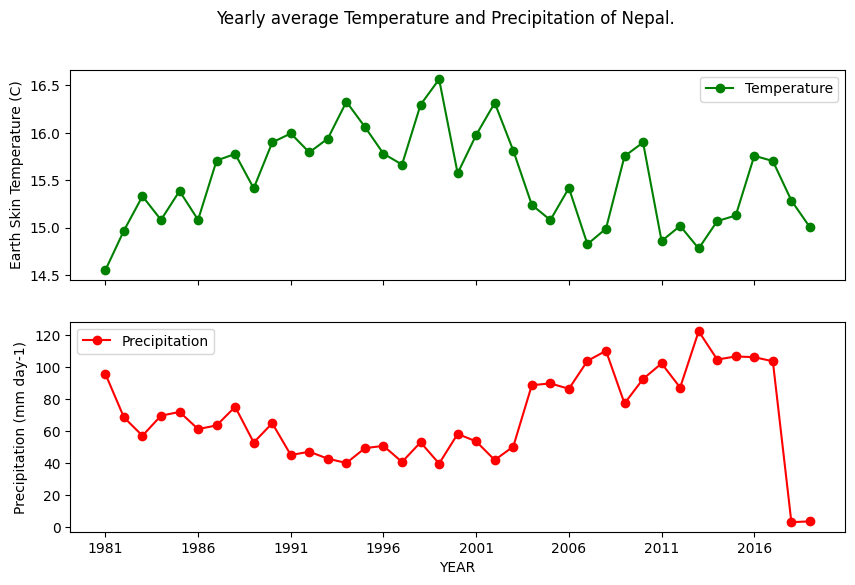

In [40]:
fig, axs = plt.subplots(2,1, figsize=(10,6), sharex=True)
fig.suptitle('Yearly average Temperature and Precipitation of Nepal.')

temp_prec_data_yearly.plot(x='YEAR', y='TS', kind='line', color='green', ax=axs[0], marker='o', label='Temperature')
axs[0].set_ylabel('Earth Skin Temperature (C)')
temp_prec_data_yearly.plot(x='YEAR', y='PRECTOT', kind='line', color='red', ax=axs[1], marker='o', label='Precipitation')
axs[1].set_ylabel('Precipitation (mm day-1)')

# axs[0].plot(temp_prec_data_yearly['YEAR'], temp_prec_data_yearly['PRECTOT'])
# axs[1].plot(temp_prec_data_districtwise['DISTRICT'], temp_prec_data_districtwise['PRECTOT'], kind='bar')
plt.show()

In [41]:
temp_prec_data_districtwise = temp_prec_data_yearly_districtwise.pivot_table(index=['DISTRICT'], values=['TS','PRECTOT'], aggfunc='mean').reset_index()

In [42]:
temp_prec_data_districtwise.head()

,DISTRICT,PRECTOT,TS
0,ARGHAKHANCHI,85.570299,22.272500
1,BAGLUNG,77.656197,13.218333
2,BAITADI,45.520299,9.664316
3,BAJANG,37.824765,5.575299
4,BANKE,80.975919,21.960235


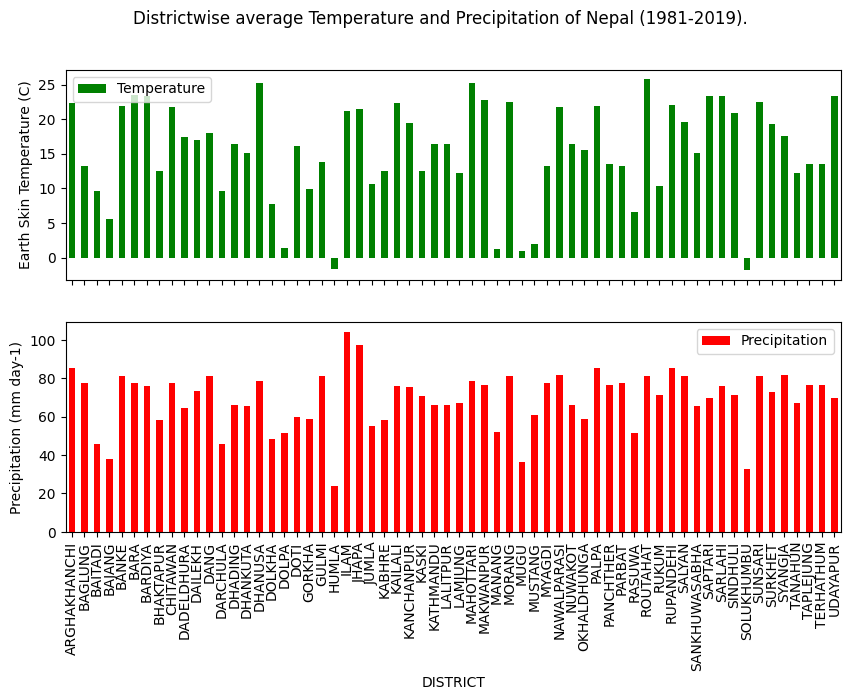

In [43]:
fig, axs = plt.subplots(2,1, figsize=(10,6), sharex=True)
fig.suptitle('Districtwise average Temperature and Precipitation of Nepal (1981-2019).')

temp_prec_data_districtwise.plot(x='DISTRICT', y='TS', kind='bar', color='green', ax=axs[0], label='Temperature')
axs[0].set_ylabel('Earth Skin Temperature (C)')
temp_prec_data_districtwise.plot(x='DISTRICT', y='PRECTOT', kind='bar', color='red', ax=axs[1], label='Precipitation')
axs[1].set_ylabel('Precipitation (mm day-1)')

# axs[0].plot(temp_prec_data_yearly['YEAR'], temp_prec_data_yearly['PRECTOT'])
# axs[1].plot(temp_prec_data_districtwise['DISTRICT'], temp_prec_data_districtwise['PRECTOT'], kind='bar')
plt.show()